# Data Preprocessing 

In [2]:
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn

# Read And Split of Data

In [4]:
dataset = pd.read_csv('fifa_players.csv') # Load the data

C:\Users\samir\AppData\Local\Temp\ipykernel_26480\27109814.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('fifa_players.csv') # Load the data


In [5]:
dataset.head(5) # Show the first 5 rows of the dataset

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


*We will make split of dataset for numerical columns dataset and text columns dataset and concatenate id column to string dataset

In [6]:
_id = dataset['sofifa_id'].astype(str)
dataset_num = dataset.select_dtypes(include=['number'])
dataset_str = dataset.select_dtypes(include=['object'])
del dataset

In [7]:
dataset_str['sofifa_id'] = _id

In [8]:
dataset_str["sofifa_id"].dtype

dtype('O')

In [9]:
dataset_str["short_name"].dtype

dtype('O')

In [10]:
dataset_num.head(2)

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN


In [11]:
dataset_num = dataset_num.drop(columns=['sofifa_id'])

In [12]:
dataset_num.head(2)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,...,96,20,35,24,6,11,15,14,8,NaN
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,...,88,35,42,19,15,6,12,8,10,NaN


In [13]:
dataset_str["sofifa_id"].dtype

dtype('O')

In [14]:
dataset_str.head(2)

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,sofifa_id
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,158023
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,188545


# Locate columns to be dropped within string columns

In [15]:
string_column_drop = []

In [16]:
dataset_str["player_url"][0] 

'https://sofifa.com/player/158023/lionel-messi/220002'

*We are going to drop the url*

In [17]:
string_column_drop.extend([col for col in dataset_str.columns if "url" in col])

In [18]:
string_column_drop 

['player_url',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']

In [19]:
dataset_str.head(2)

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,sofifa_id
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,158023
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,188545


*Do we even need Long name if we have the short?
Lets drop it too*

In [20]:
dataset_str["short_name"].isnull().value_counts()

short_name
False    19239
Name: count, dtype: int64

In [21]:
dataset_str["long_name"].isnull().value_counts()

long_name
False    19239
Name: count, dtype: int64

In [22]:
string_column_drop.append("long_name")

In [23]:
string_column_drop

['player_url',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url',
 'long_name']

In [24]:
dataset_str["player_positions"] = dataset_str["player_positions"].str.split(', ',expand=True)[0]
dataset_str["player_positions"]

0         RW
1         ST
2         ST
3         LW
4         CM
        ... 
19234    CDM
19235     CM
19236     CM
19237     ST
19238    CAM
Name: player_positions, Length: 19239, dtype: object

*Player position contain many position in one cell, but for our analysis we need the main position only so we going to select only one position(probably main)*

In [25]:
positions_variables = [col for col in dataset_str.columns if "position" in col and "positioning" not in col]
positions_variables

['player_positions', 'club_position', 'nation_position']

*lets find out whether club/nation and player positions are needed to be separated*

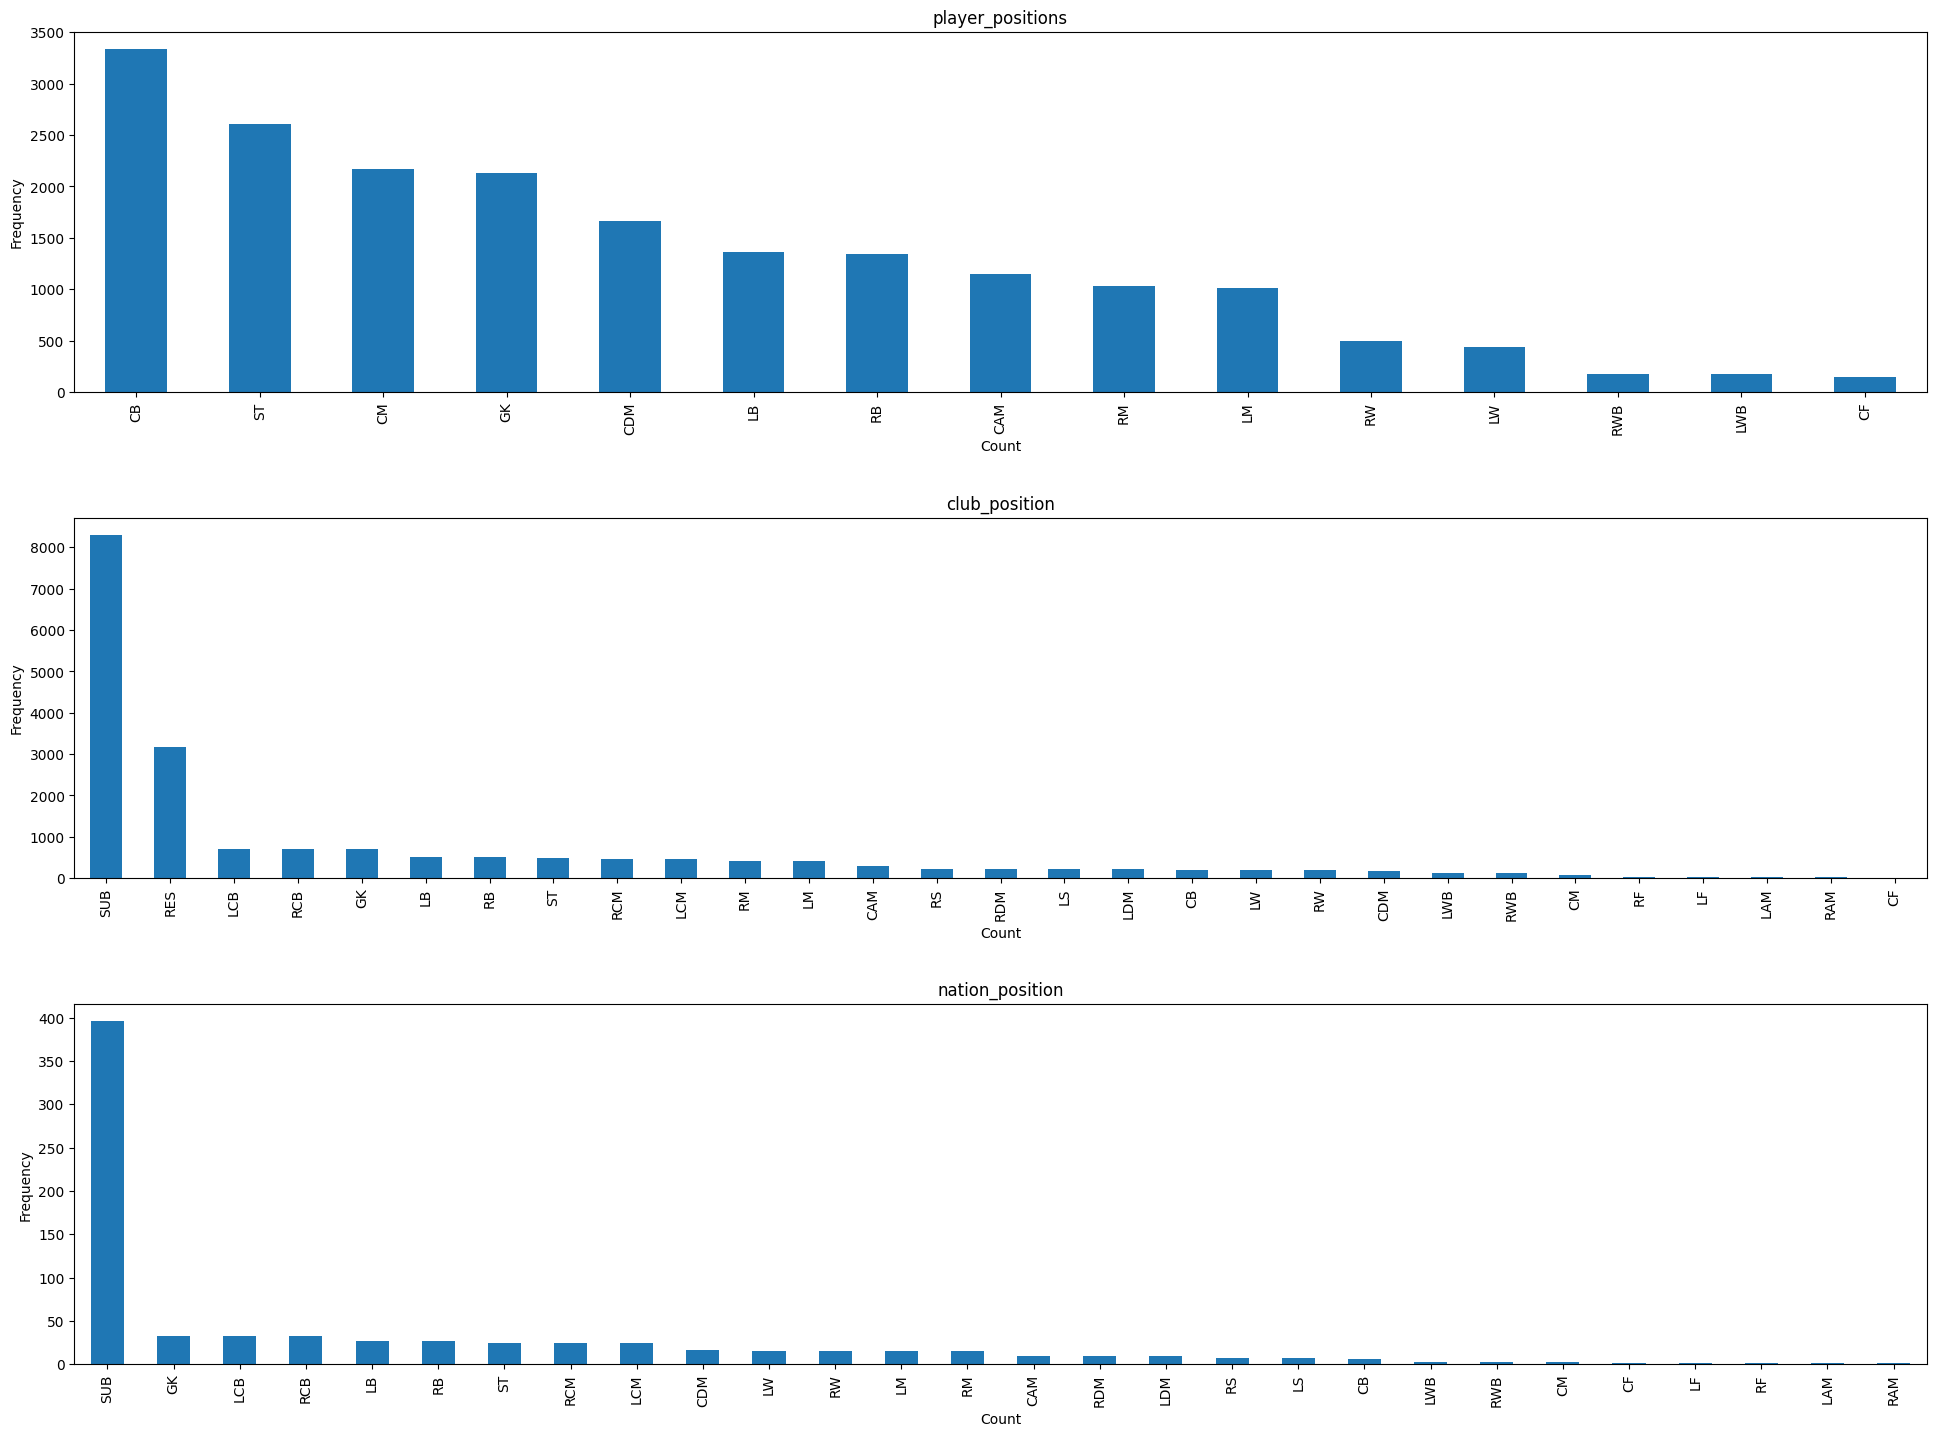

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15)) 

for _ax, _pos in enumerate(positions_variables):
    dataset_str[_pos].value_counts().plot(kind='bar', ax=axes[_ax]) 
    axes[_ax].set_title(_pos)
    axes[_ax].set_xlabel('Count')
    axes[_ax].set_ylabel('Frequency')
    axes[_ax].grid(False)

plt.tight_layout(pad=3.0) 
plt.show()


*distribution of club and nation positions are relatively same, but player position is divided more properly, hence I will keep only player position*

In [27]:
string_column_drop.append("club_positions")
string_column_drop.append("nation_position")

*variables player_traits and player_tags have too many categories so they are completly useless in further analysis*

In [28]:
string_column_drop.append("player_tags")
string_column_drop.append("player_traits")
string_column_drop.append("real_face")

*dob and age corresponds to each other so dob will be removed*

In [29]:
string_column_drop.append("dob")


In [30]:
string_column_drop

['player_url',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url',
 'long_name',
 'club_positions',
 'nation_position',
 'player_tags',
 'player_traits',
 'real_face',
 'dob']

In [31]:
dataset_str["body_type"].value_counts()


body_type
Normal (170-185)    6685
Normal (185+)       4236
Lean (170-185)      4086
Lean (185+)         1938
Normal (170-)        669
Stocky (170-185)     560
Lean (170-)          477
Stocky (185+)        355
Unique               136
Stocky (170-)         97
Name: count, dtype: int64

In [32]:
pd.set_option('display.max_columns', None)
dataset_str.head(2)
# dataset_num.head(2)

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,nation_position,preferred_foot,work_rate,body_type,real_face,player_tags,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,sofifa_id
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,RW,Left,Medium/Low,Unique,Yes,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,158023
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,RS,Right,High/Medium,Unique,Yes,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,188545


In [33]:
dataset_str.body_type.value_counts()

body_type
Normal (170-185)    6685
Normal (185+)       4236
Lean (170-185)      4086
Lean (185+)         1938
Normal (170-)        669
Stocky (170-185)     560
Lean (170-)          477
Stocky (185+)        355
Unique               136
Stocky (170-)         97
Name: count, dtype: int64

*since body type should indicates player position we will keep this variable*

In [34]:
start_index = dataset_str.columns.get_loc('ls')
end_index = dataset_str.columns.get_loc('gk')
dataset_str.iloc[:, start_index : end_index ].head()


,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3


*this analysis includes only basic stats of player, therefore all advanced statistcs will be droped*

In [35]:
dataset_str.drop(dataset_str.iloc[ : , start_index : end_index], axis = "columns", inplace = True) # Drop the columns

In [36]:
dataset_str.head(2)

,player_url,short_name,long_name,player_positions,dob,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,nation_position,preferred_foot,work_rate,body_type,real_face,player_tags,player_traits,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,sofifa_id
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,1987-06-24,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,RW,Left,Medium/Low,Unique,Yes,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,158023
1,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,1988-08-21,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,RS,Right,High/Medium,Unique,Yes,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,188545


# Drop Useless String Attributes

In [37]:
columns_to_drop = [col for col in string_column_drop if col in dataset_str.columns]
dataset_str.drop(columns=columns_to_drop, inplace=True)

In [38]:
dataset_str.head(2)

,short_name,player_positions,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,preferred_foot,work_rate,body_type,gk,sofifa_id
0,L. Messi,RW,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,Left,Medium/Low,Unique,19+3,158023
1,R. Lewandowski,ST,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,Right,High/Medium,Unique,19+3,188545


# Locate columns to be dropped within numerical columns


In [39]:
number_columns_drop = []


In [40]:
dataset_str.head(2)

,short_name,player_positions,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,preferred_foot,work_rate,body_type,gk,sofifa_id
0,L. Messi,RW,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,Left,Medium/Low,Unique,19+3,158023
1,R. Lewandowski,ST,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,Right,High/Medium,Unique,19+3,188545


In [41]:
dataset_num.head(2)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,30.0,2023.0,52,1369.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,9.0,2023.0,37,1353.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN


*Since Nationality name already present in the dataset_str, so we remove nationality_id and nation_team_id*

In [42]:
number_columns_drop.extend(["nationality_id", "nation_team_id"])


*Also we have club_name so we remove club_team_id too*

In [43]:
number_columns_drop.append("club_team_id")


*lets find out which advances statistcs have interesting distributions*

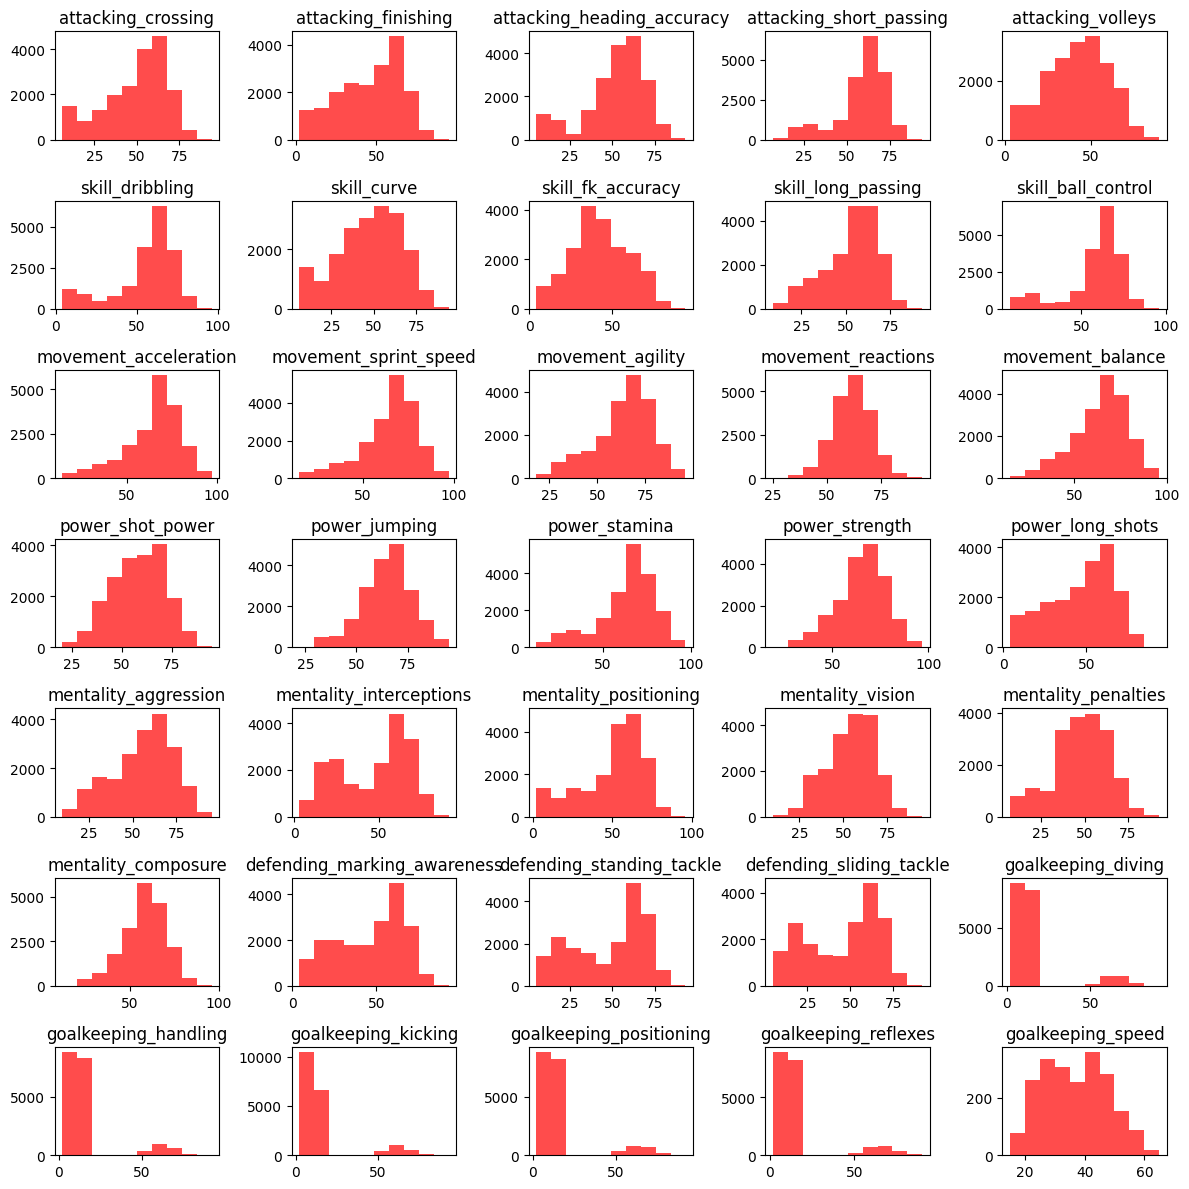

In [44]:
start_index = dataset_num.columns.get_loc("attacking_crossing")
end_index = dataset_num.columns.get_loc("goalkeeping_speed") + 1

advanced_num_data = dataset_num.iloc[:, start_index : end_index]

rows = advanced_num_data.shape[1] // 5
cols = advanced_num_data.shape[1] // 7
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

for i, _col in enumerate(advanced_num_data.columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    ax.hist(advanced_num_data[_col], bins=10, alpha=0.7, color='red')
    ax.set_title(f'{_col}')


plt.tight_layout()
plt.show()

In [45]:
defending_sliding_tackle = dataset_num["defending_sliding_tackle"]


*Dropping useless numerical variables*

In [46]:
dataset_num.drop(dataset_num.iloc[:, start_index : end_index], axis="columns", inplace = True)

In [47]:
dataset_num.drop(columns=number_columns_drop, inplace = True)


In [48]:
dataset_num.head(3)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic
0,93,93,78000000.0,320000.0,34,170,72,1.0,30.0,2023.0,10.0,4,4,5,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0
1,92,92,119500000.0,270000.0,32,185,81,1.0,9.0,2023.0,9.0,4,4,5,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0
2,91,91,45000000.0,270000.0,36,187,83,1.0,7.0,2023.0,7.0,4,5,5,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0


In [49]:
dataset_num = pd.concat([dataset_num, defending_sliding_tackle], axis=1)

*Euro salary, release clause, value converted int milions and thousands and rename*

In [50]:
dataset_num.rename(inplace=True, columns={"value_eur" : "value_mln_eur", "wage_eur" : "wage_k_eur", 
                                          "release_clause_eur" : "release_clause_mln_eur"})

dataset_num["release_clause_mln_eur"] = dataset_num["release_clause_mln_eur"] / 1000000
dataset_num["value_mln_eur"] = dataset_num["value_mln_eur"] / 1000000
dataset_num["wage_k_eur"] = dataset_num["wage_k_eur"] / 1000

In [51]:
dataset_num

,overall,potential,value_mln_eur,wage_k_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_mln_eur,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle
0,93,93,78.00,320.0,34,170,72,1.0,30.0,2023.0,10.0,4,4,5,144.300,85.0,92.0,91.0,95.0,34.0,65.0,24
1,92,92,119.50,270.0,32,185,81,1.0,9.0,2023.0,9.0,4,4,5,197.200,78.0,92.0,79.0,86.0,44.0,82.0,19
2,91,91,45.00,270.0,36,187,83,1.0,7.0,2023.0,7.0,4,5,5,83.300,87.0,94.0,80.0,88.0,34.0,75.0,24
3,91,91,129.00,270.0,29,175,68,1.0,10.0,2025.0,NaN,5,5,5,238.700,91.0,83.0,86.0,94.0,37.0,63.0,29
4,91,91,125.50,350.0,30,181,70,1.0,17.0,2025.0,7.0,5,4,4,232.200,76.0,86.0,93.0,88.0,64.0,78.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,0.07,1.0,22,180,64,1.0,36.0,2021.0,NaN,3,2,1,0.114,58.0,35.0,46.0,48.0,42.0,49.0,48
19235,47,59,0.11,0.5,19,175,70,1.0,27.0,2021.0,NaN,3,2,1,0.193,59.0,39.0,50.0,46.0,41.0,51.0,47
19236,47,55,0.10,0.5,21,178,72,1.0,31.0,2021.0,NaN,3,2,1,0.175,60.0,37.0,45.0,49.0,41.0,52.0,48
19237,47,60,0.11,0.5,19,173,66,1.0,12.0,2021.0,NaN,3,2,1,0.239,68.0,46.0,36.0,48.0,15.0,42.0,11


*rename weak_foot because we have preferred foot which indicates body statistics and weak_foot which belongs to skills table*

In [52]:
dataset_num.rename(columns={"weak_foot" : "weak_foot_points"}, inplace = True)


In [53]:
dataset_num.head(4)

,overall,potential,value_mln_eur,wage_k_eur,age,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot_points,skill_moves,international_reputation,release_clause_mln_eur,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle
0,93,93,78.0,320.0,34,170,72,1.0,30.0,2023.0,10.0,4,4,5,144.3,85.0,92.0,91.0,95.0,34.0,65.0,24
1,92,92,119.5,270.0,32,185,81,1.0,9.0,2023.0,9.0,4,4,5,197.2,78.0,92.0,79.0,86.0,44.0,82.0,19
2,91,91,45.0,270.0,36,187,83,1.0,7.0,2023.0,7.0,4,5,5,83.3,87.0,94.0,80.0,88.0,34.0,75.0,24
3,91,91,129.0,270.0,29,175,68,1.0,10.0,2025.0,NaN,5,5,5,238.7,91.0,83.0,86.0,94.0,37.0,63.0,29


In [54]:
dataset_str.head(4)

,short_name,player_positions,club_name,league_name,club_position,club_loaned_from,club_joined,nationality_name,preferred_foot,work_rate,body_type,gk,sofifa_id
0,L. Messi,RW,Paris Saint-Germain,French Ligue 1,RW,NaN,2021-08-10,Argentina,Left,Medium/Low,Unique,19+3,158023
1,R. Lewandowski,ST,FC Bayern München,German 1. Bundesliga,ST,NaN,2014-07-01,Poland,Right,High/Medium,Unique,19+3,188545
2,Cristiano Ronaldo,ST,Manchester United,English Premier League,ST,NaN,2021-08-27,Portugal,Right,High/Low,Unique,20+3,20801
3,Neymar Jr,LW,Paris Saint-Germain,French Ligue 1,LW,NaN,2017-08-03,Brazil,Right,High/Medium,Unique,20+3,190871


*Splitting into more descriptive tables*

### Club

In [55]:
club_str = dataset_str[["sofifa_id", "club_name", "league_name", "club_loaned_from", "club_joined","player_positions"]]
club_num = dataset_num[["league_level", "club_jersey_number", "club_contract_valid_until"]]
club = pd.concat([club_str, club_num], axis=1)
club.head()

,sofifa_id,club_name,league_name,club_loaned_from,club_joined,player_positions,league_level,club_jersey_number,club_contract_valid_until
0,158023,Paris Saint-Germain,French Ligue 1,NaN,2021-08-10,RW,1.0,30.0,2023.0
1,188545,FC Bayern München,German 1. Bundesliga,NaN,2014-07-01,ST,1.0,9.0,2023.0
2,20801,Manchester United,English Premier League,NaN,2021-08-27,ST,1.0,7.0,2023.0
3,190871,Paris Saint-Germain,French Ligue 1,NaN,2017-08-03,LW,1.0,10.0,2025.0
4,192985,Manchester City,English Premier League,NaN,2015-08-30,CM,1.0,17.0,2025.0


### Skills

In [56]:
skills_str = dataset_str[["sofifa_id", "work_rate"]]
skills_num = dataset_num[["overall", "potential", "pace", "shooting", "passing", "dribbling", "defending", "physic", "defending_sliding_tackle", 
                          "skill_moves", "weak_foot_points"]]
skills = pd.concat([skills_str, skills_num], axis=1)
skills.head()

,sofifa_id,work_rate,overall,potential,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points
0,158023,Medium/Low,93,93,85.0,92.0,91.0,95.0,34.0,65.0,24,4,4
1,188545,High/Medium,92,92,78.0,92.0,79.0,86.0,44.0,82.0,19,4,4
2,20801,High/Low,91,91,87.0,94.0,80.0,88.0,34.0,75.0,24,5,4
3,190871,High/Medium,91,91,91.0,83.0,86.0,94.0,37.0,63.0,29,5,5
4,192985,High/High,91,91,76.0,86.0,93.0,88.0,64.0,78.0,53,4,5


### Body Stats

In [57]:
body_stats_str = dataset_str[["sofifa_id", "preferred_foot", "body_type"]]
body_stats_num = dataset_num[["age", "height_cm", "weight_kg"]]
body_stats = pd.concat([body_stats_str, body_stats_num], axis=1)
body_stats.head()

,sofifa_id,preferred_foot,body_type,age,height_cm,weight_kg
0,158023,Left,Unique,34,170,72
1,188545,Right,Unique,32,185,81
2,20801,Right,Unique,36,187,83
3,190871,Right,Unique,29,175,68
4,192985,Right,Unique,30,181,70


### Player Finance

In [58]:
player_finance_str = dataset_str[["sofifa_id"]]
player_finance_num = dataset_num[["value_mln_eur", "wage_k_eur", "release_clause_mln_eur"]]
player_finance = pd.concat([player_finance_str, player_finance_num], axis=1)
player_finance.head()

,sofifa_id,value_mln_eur,wage_k_eur,release_clause_mln_eur
0,158023,78.0,320.0,144.3
1,188545,119.5,270.0,197.2
2,20801,45.0,270.0,83.3
3,190871,129.0,270.0,238.7
4,192985,125.5,350.0,232.2


### Player international

In [59]:
player_international_str = dataset_str[["sofifa_id", "nationality_name"]]
player_international_num = dataset_num[["international_reputation", "nation_jersey_number"]]
player_international = pd.concat([player_international_str, player_international_num], axis=1)
player_international.head()

,sofifa_id,nationality_name,international_reputation,nation_jersey_number
0,158023,Argentina,5,10.0
1,188545,Poland,5,9.0
2,20801,Portugal,5,7.0
3,190871,Brazil,5,NaN
4,192985,Belgium,4,7.0


### Name

In [60]:
player_name = dataset_str[["sofifa_id", "short_name"]]
player_name.head(60)

,sofifa_id,short_name
0,158023,L. Messi
1,188545,R. Lewandowski
2,20801,Cristiano Ronaldo
3,190871,Neymar Jr
4,192985,K. De Bruyne
5,200389,J. Oblak
6,231747,K. Mbappé
7,167495,M. Neuer
8,192448,M. ter Stegen
9,202126,H. Kane


*Removing pointers to num and str dataste*

In [61]:
if 'dataset_num' in globals():
    del dataset_num
if 'dataset_str' in globals():
    del dataset_str

*Lemme Group the positions to goalkeepers, defenders, midfielders and strikers*

In [62]:
club.player_positions.value_counts()

player_positions
CB     3339
ST     2608
CM     2173
GK     2132
CDM    1665
LB     1360
RB     1346
CAM    1151
RM     1028
LM     1016
RW      495
LW      435
RWB     178
LWB     171
CF      142
Name: count, dtype: int64

In [63]:
group_mapping = {"GK":"goalkeepers",
                 "CB": "defenders", "RB": "defenders", "LB": "defenders", "RWB": "defenders", "LWB": "defenders",
                 "CM": "midfield", "CDM": "midfield", "CAM": "midfield", "RM": "midfield", "LM": "midfield",
                 "ST": "forward", "CF": "forward", "RW": "forward", "RM": "forward", "LW": "forward",}

club["position"] = club["player_positions"].map(group_mapping)
club.drop(columns = ["player_positions"], axis="columns", inplace = True)

In [64]:
club.position.value_counts()

position
defenders      6394
midfield       6005
forward        4708
goalkeepers    2132
Name: count, dtype: int64

*Saving all cleaned datasets*

In [65]:
import os

os.makedirs('cleaned_data', exist_ok=True)

club.to_csv('cleaned_data/club.csv', index=False)
skills.to_csv('cleaned_data/skills.csv', index=False)
body_stats.to_csv('cleaned_data/body_stats.csv', index=False)
player_finance.to_csv('cleaned_data/player_finance.csv', index=False)
player_international.to_csv('cleaned_data/player_international.csv', index=False)
player_name.to_csv('cleaned_data/player_name.csv', index=False)

# Analysis and observations

###

### what would look like a team with best possible overall rating and lowest possible overall price (value) and players over 75+?

In [108]:
import pandas as pd
from IPython.display import display

club = pd.read_csv('cleaned_data/club.csv')
skills = pd.read_csv('cleaned_data/skills.csv')
body_stats = pd.read_csv('cleaned_data/body_stats.csv')
player_finance = pd.read_csv('cleaned_data/player_finance.csv')
player_international = pd.read_csv('cleaned_data/player_international.csv')
player_name = pd.read_csv('cleaned_data/player_name.csv')

print("club")
display(club.head())
print("skills")
display(skills.head())
print("body_stats")
display(body_stats.head())
print("player_finance")
display(player_finance.head())
print("player_international")
display(player_international.head())
print("player_name")
display(player_name.head())


club


,sofifa_id,club_name,league_name,club_loaned_from,club_joined,league_level,club_jersey_number,club_contract_valid_until,position
0,158023,Paris Saint-Germain,French Ligue 1,NaN,2021-08-10,1.0,30.0,2023.0,forward
1,188545,FC Bayern München,German 1. Bundesliga,NaN,2014-07-01,1.0,9.0,2023.0,forward
2,20801,Manchester United,English Premier League,NaN,2021-08-27,1.0,7.0,2023.0,forward
3,190871,Paris Saint-Germain,French Ligue 1,NaN,2017-08-03,1.0,10.0,2025.0,forward
4,192985,Manchester City,English Premier League,NaN,2015-08-30,1.0,17.0,2025.0,midfield


skills


,sofifa_id,work_rate,overall,potential,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points
0,158023,Medium/Low,93,93,85.0,92.0,91.0,95.0,34.0,65.0,24,4,4
1,188545,High/Medium,92,92,78.0,92.0,79.0,86.0,44.0,82.0,19,4,4
2,20801,High/Low,91,91,87.0,94.0,80.0,88.0,34.0,75.0,24,5,4
3,190871,High/Medium,91,91,91.0,83.0,86.0,94.0,37.0,63.0,29,5,5
4,192985,High/High,91,91,76.0,86.0,93.0,88.0,64.0,78.0,53,4,5


body_stats


,sofifa_id,preferred_foot,body_type,age,height_cm,weight_kg
0,158023,Left,Unique,34,170,72
1,188545,Right,Unique,32,185,81
2,20801,Right,Unique,36,187,83
3,190871,Right,Unique,29,175,68
4,192985,Right,Unique,30,181,70


player_finance


,sofifa_id,value_mln_eur,wage_k_eur,release_clause_mln_eur
0,158023,78.0,320.0,144.3
1,188545,119.5,270.0,197.2
2,20801,45.0,270.0,83.3
3,190871,129.0,270.0,238.7
4,192985,125.5,350.0,232.2


player_international


,sofifa_id,nationality_name,international_reputation,nation_jersey_number
0,158023,Argentina,5,10.0
1,188545,Poland,5,9.0
2,20801,Portugal,5,7.0
3,190871,Brazil,5,NaN
4,192985,Belgium,4,7.0


player_name


,sofifa_id,short_name
0,158023,L. Messi
1,188545,R. Lewandowski
2,20801,Cristiano Ronaldo
3,190871,Neymar Jr
4,192985,K. De Bruyne


In [69]:
question1 = pd.concat([club[["position"]], player_finance[["value_mln_eur"]], player_name[["short_name"]], skills[["overall"]]], axis = 1)
question1

,position,value_mln_eur,short_name,overall
0,forward,78.00,L. Messi,93
1,forward,119.50,R. Lewandowski,92
2,forward,45.00,Cristiano Ronaldo,91
3,forward,129.00,Neymar Jr,91
4,midfield,125.50,K. De Bruyne,91
...,...,...,...,...
19234,midfield,0.07,Song Defu,47
19235,midfield,0.11,C. Porter,47
19236,midfield,0.10,N. Logue,47
19237,forward,0.11,L. Rudden,47


In [70]:
question1["overall/value_ratio"] = question1["value_mln_eur"]/ question1["overall"]
question1 = question1[question1["overall"]> 75]
question1.head(25)

,position,value_mln_eur,short_name,overall,overall/value_ratio
0,forward,78.0,L. Messi,93,0.838710
1,forward,119.5,R. Lewandowski,92,1.298913
2,forward,45.0,Cristiano Ronaldo,91,0.494505
3,forward,129.0,Neymar Jr,91,1.417582
4,midfield,125.5,K. De Bruyne,91,1.379121
5,goalkeepers,112.0,J. Oblak,91,1.230769
6,forward,194.0,K. Mbappé,91,2.131868
7,goalkeepers,13.5,M. Neuer,90,0.150000
8,goalkeepers,99.0,M. ter Stegen,90,1.100000
9,forward,129.5,H. Kane,90,1.438889


*We neeed 1 goalkeeper, 4 defenders, 3 midfields and 3 forward players*

In [74]:
num_goalkeeper, num_defense, num_midfields, num_forward = 1, 4, 3, 3
team = pd.DataFrame(data = None, columns = question1.columns, index = question1.index).head(0)

for _pos in question1["position"].unique():
    if _pos == "goalkeepers":
        _players = question1[question1["position"] == _pos].sort_values("overall/value_ratio", ascending = True).head(1)
    elif _pos == "defenders":
        _players = question1[question1["position"] == _pos].sort_values("overall/value_ratio", ascending = True).head(4)
    else:
        _players = question1[question1["position"] == _pos].sort_values("overall/value_ratio", ascending = True).head(3)
    team = pd.concat([team, _players])

C:\Users\samir\AppData\Local\Temp\ipykernel_26480\2820193421.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team = pd.concat([team, _players])


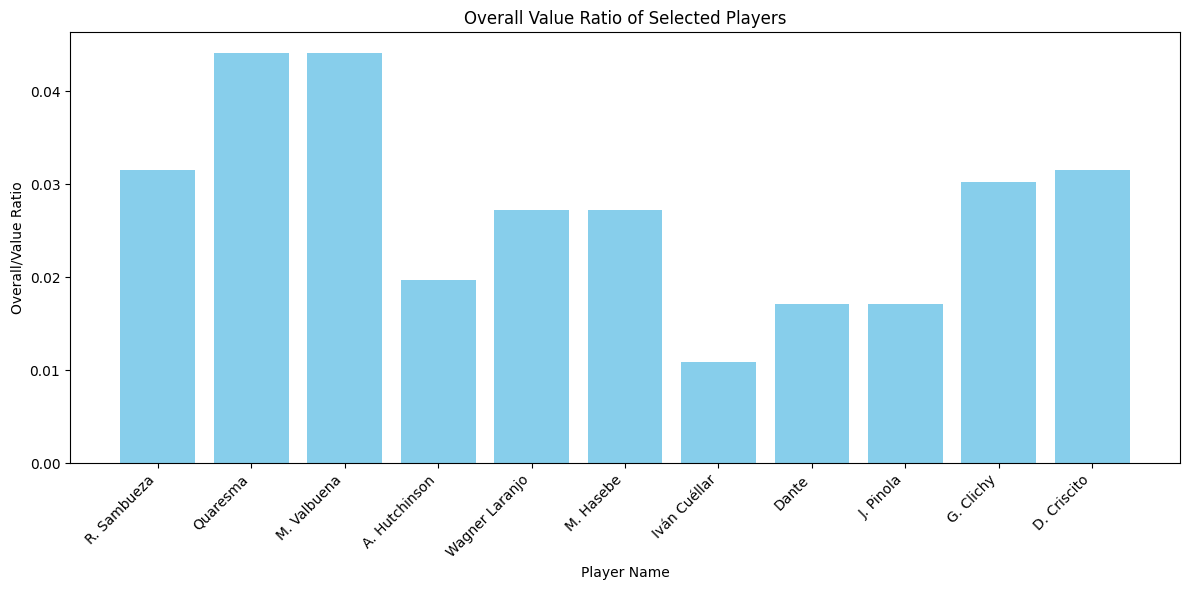

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(team['short_name'], team['overall/value_ratio'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Overall/Value Ratio')
plt.title('Overall Value Ratio of Selected Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
team

,position,value_mln_eur,short_name,overall,overall/value_ratio
1145,forward,2.400,R. Sambueza,76,0.031579
863,forward,3.400,Quaresma,77,0.044156
878,forward,3.400,M. Valbuena,77,0.044156
1138,midfield,1.500,A. Hutchinson,76,0.019737
1041,midfield,2.100,Wagner Laranjo,77,0.027273
883,midfield,2.100,M. Hasebe,77,0.027273
1141,goalkeepers,0.825,Iván Cuéllar,76,0.010855
1147,defenders,1.300,Dante,76,0.017105
1142,defenders,1.300,J. Pinola,76,0.017105
1144,defenders,2.300,G. Clichy,76,0.030263


*Let's see how the best team looks*

In [85]:
num_goalkeeper, num_defense, num_midfields, num_forward = 1, 4, 3, 3
team = pd.DataFrame(data = None, columns = question1.columns, index = question1.index).head(0)

for _pos in question1["position"].unique():
    if _pos == "goalkeepers":
        _players = question1[question1["position"] == _pos].sort_values("overall", ascending = False).head(1)
    elif _pos == "defenders":
        _players = question1[question1["position"] == _pos].sort_values("overall", ascending = False).head(4)
    else:
        _players = question1[question1["position"] == _pos].sort_values("overall", ascending = False).head(3)
    team = pd.concat([team, _players], axis=0)


C:\Users\samir\AppData\Local\Temp\ipykernel_26480\4213005562.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  team = pd.concat([team, _players], axis=0)


In [86]:
team

,position,value_mln_eur,short_name,overall,overall/value_ratio
0,forward,78.0,L. Messi,93,0.838710
1,forward,119.5,R. Lewandowski,92,1.298913
2,forward,45.0,Cristiano Ronaldo,91,0.494505
4,midfield,125.5,K. De Bruyne,91,1.379121
10,midfield,100.0,N. Kanté,90,1.111111
19,midfield,108.0,J. Kimmich,89,1.213483
5,goalkeepers,112.0,J. Oblak,91,1.230769
15,defenders,86.0,V. van Dijk,89,0.966292
22,defenders,24.0,Sergio Ramos,88,0.272727
46,defenders,102.5,Rúben Dias,87,1.178161


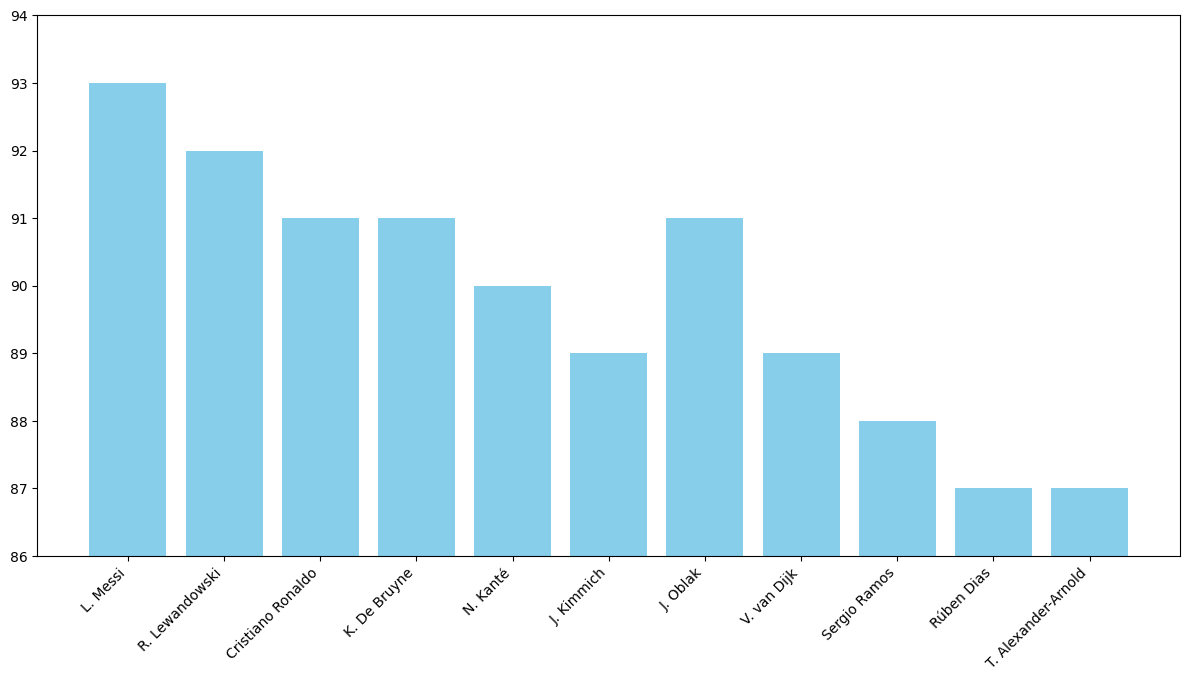

In [106]:
import numpy as np

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(team['short_name'], team['overall'], color='skyblue')
plt.ylim(team['overall'].min() - 1, team['overall'].max() + 1)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


##### *Conclusion: I know Dante deserves more rating but good to see in the bestvalue to overall rating squad* <br>
##### *I love J. Oblak, he is so underrated, he finally makes it to top 11*

### which countries have best and worst prodigies based on potential score?


In [124]:
quesiton2 = pd.concat([skills["potential"], player_international["nationality_name"], player_name["short_name"]], axis=1)
quesiton2
top10= quesiton2.groupby("nationality_name").mean("potential").sort_values("potential", ascending = False).head(10)
bottom10 = quesiton2.groupby("nationality_name").mean("potential").sort_values("potential", ascending = True).head(10)
display(top10)
display(bottom10)

,potential
nationality_name,
Estonia,80.000000
Egypt,75.833333
Burkina Faso,75.750000
Ukraine,75.159420
Portugal,75.002681
Spain,74.882136
Belarus,74.750000
Libya,74.666667
Russia,74.645161


,potential
nationality_name,
Hong Kong,59.000000
India,60.461883
China PR,61.555844
Indonesia,62.000000
Barbados,63.000000
Belize,63.000000
Niger,63.333333
Lebanon,63.500000
Montserrat,63.600000


C:\Users\samir\AppData\Local\Temp\ipykernel_26480\909964068.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10.index, rotation=45, ha='right')
C:\Users\samir\AppData\Local\Temp\ipykernel_26480\909964068.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bottom10.index, rotation=45, ha='right')


<Figure size 1200x600 with 0 Axes>

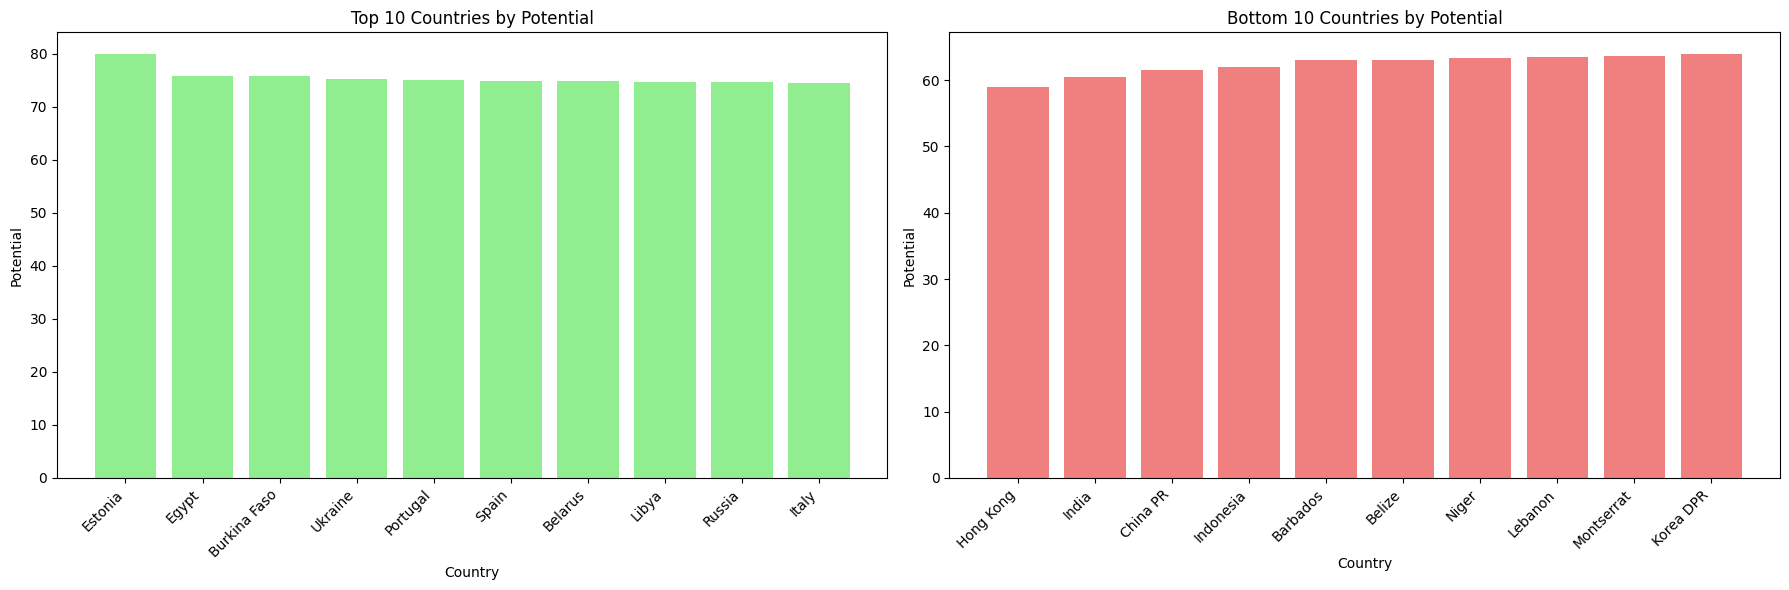

In [137]:
plt.figure(figsize=(12, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.bar(top10.index, top10["potential"], color='lightgreen')
ax1.set_title('Top 10 Countries by Potential')
ax1.set_xlabel('Country')
ax1.set_ylabel('Potential')
ax1.set_xticklabels(top10.index, rotation=45, ha='right')

ax2.bar(bottom10.index, bottom10["potential"], color='lightcoral')
ax2.set_title('Bottom 10 Countries by Potential')
ax2.set_xlabel('Country')
ax2.set_ylabel('Potential')
ax2.set_xticklabels(bottom10.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### *Conclusion: based on potential scores, we've found that Estonia has the highest prodigies and hongkong has the lowest <br> best prodigy players mainly comes from Europe : Portugal, Ukraine, Estonia. Worst prodigies comes from Asia*

### which player over 75 overall points have most balances = less difference between each skills points and vice versa?


In [150]:
skills_list = ["pace", "shooting", "passing", "dribbling", "defending", "physic", "defending_sliding_tackle", "skill_moves","weak_foot_points"]
question3 = pd.concat([skills[skills_list],player_name[["short_name"]], skills[["overall"]]], axis = 1)
question3 = question3[question3["overall"]  > 75 ]
question3_before_norm = question3
display(question3)    
display(skills_list)

,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points,short_name,overall
0,85.0,92.0,91.0,95.0,34.0,65.0,24,4,4,L. Messi,93
1,78.0,92.0,79.0,86.0,44.0,82.0,19,4,4,R. Lewandowski,92
2,87.0,94.0,80.0,88.0,34.0,75.0,24,5,4,Cristiano Ronaldo,91
3,91.0,83.0,86.0,94.0,37.0,63.0,29,5,5,Neymar Jr,91
4,76.0,86.0,93.0,88.0,64.0,78.0,53,4,5,K. De Bruyne,91
...,...,...,...,...,...,...,...,...,...,...,...
1459,88.0,74.0,68.0,79.0,29.0,53.0,28,4,4,Ansu Fati,76
1460,84.0,75.0,69.0,73.0,40.0,84.0,30,3,3,D. Núñez,76
1461,73.0,70.0,70.0,77.0,67.0,73.0,62,3,3,Matheus Nunes,76
1462,82.0,62.0,71.0,75.0,69.0,69.0,71,2,3,M. Viña,76


['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'defending_sliding_tackle',
 'skill_moves',
 'weak_foot_points']

In [151]:
for _skill in skills_list:
    print(f"{_skill} number of NaN values : {question3[_skill].isnull().sum()}")

pace number of NaN values : 157
shooting number of NaN values : 157
passing number of NaN values : 157
dribbling number of NaN values : 157
defending number of NaN values : 157
physic number of NaN values : 157
defending_sliding_tackle number of NaN values : 0
skill_moves number of NaN values : 0
weak_foot_points number of NaN values : 0


In [160]:
question3 = question3.dropna(subset=["pace", "shooting", "passing", "dribbling", "defending", "physic", "defending_sliding_tackle", "skill_moves","weak_foot_points"])


In [163]:
question3

,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points,short_name,overall,diff
0,0.815385,0.972222,0.963636,1.00,0.197183,0.545455,0.160494,0.666667,0.75,L. Messi,93,0.839506
1,0.707692,0.972222,0.745455,0.82,0.338028,0.854545,0.098765,0.666667,0.75,R. Lewandowski,92,0.873457
2,0.846154,1.000000,0.763636,0.86,0.197183,0.727273,0.160494,1.000000,0.75,Cristiano Ronaldo,91,0.839506
3,0.907692,0.847222,0.872727,0.98,0.239437,0.509091,0.222222,1.000000,1.00,Neymar Jr,91,0.777778
4,0.676923,0.888889,1.000000,0.86,0.619718,0.781818,0.518519,0.666667,1.00,K. De Bruyne,91,0.481481
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,0.861538,0.722222,0.545455,0.68,0.126761,0.327273,0.209877,0.666667,0.75,Ansu Fati,76,0.734778
1460,0.800000,0.736111,0.563636,0.56,0.281690,0.890909,0.234568,0.333333,0.50,D. Núñez,76,0.656341
1461,0.630769,0.666667,0.581818,0.64,0.661972,0.690909,0.629630,0.333333,0.50,Matheus Nunes,76,0.357576
1462,0.769231,0.555556,0.600000,0.60,0.690141,0.618182,0.740741,0.000000,0.50,M. Viña,76,0.769231


In [165]:
def normalization(_col):
    _min = _col.min()
    _max = _col.max()
    return (_col - _min) / (_max - _min)

for _skill in skills_list:
    question3.loc[:, _skill] = normalization(question3[_skill])

question3.loc[:, "diff"] = abs(question3[skills_list].min(axis=1) - question3[skills_list].max(axis=1))

most_balanced_player = question3.sort_values("diff", ascending=True).head(3)
less_balanced_player = question3.sort_values("diff", ascending=False).head(3)
display(most_balanced_player)
display(less_balanced_player)
display(skills_list)

,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points,short_name,overall,diff
549,0.753846,0.722222,0.709091,0.74,0.661972,0.709091,0.703704,0.666667,0.75,A. Oxlade-Chamberlain,79,0.091874
413,0.676923,0.722222,0.745455,0.72,0.676056,0.690909,0.765432,0.666667,0.75,R. Pereyra,80,0.098765
797,0.646154,0.666667,0.654545,0.72,0.676056,0.690909,0.716049,0.666667,0.75,A. Fulgini,78,0.103846


,pace,shooting,passing,dribbling,defending,physic,defending_sliding_tackle,skill_moves,weak_foot_points,short_name,overall,diff
1346,0.553846,0.305556,0.490909,0.42,0.802817,0.781818,0.839506,0.0,1.0,T. Kehrer,76,1.0
14,0.507692,0.708333,0.690909,0.56,0.929577,1.000000,0.938272,0.0,0.5,Casemiro,89,1.0
15,0.707692,0.527778,0.600000,0.54,1.000000,0.890909,0.925926,0.0,0.5,V. van Dijk,89,1.0


['pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'defending_sliding_tackle',
 'skill_moves',
 'weak_foot_points']

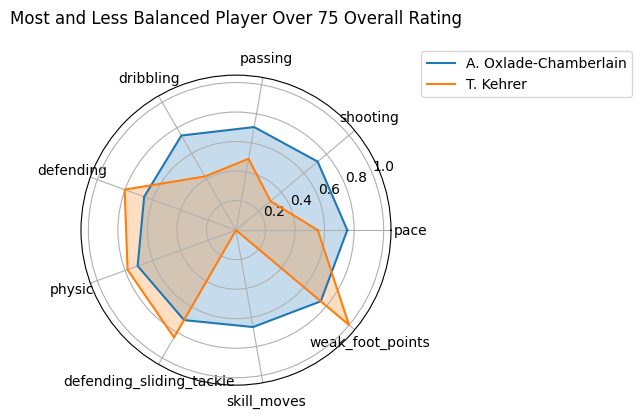

In [167]:
attributes = skills_list
most_balanced_player_values = most_balanced_player[skills_list].iloc[0, : ].tolist()
less_balanced_player_values = less_balanced_player[skills_list].iloc[0, : ].tolist()

name_most_balanced = most_balanced_player["short_name"].iloc[0]
name_less_balanced = less_balanced_player["short_name"].iloc[0]

fig, ax = plt.subplots(figsize=(4, 6), subplot_kw=dict(polar=True))

num_vars = len(attributes)

angles = np.linspace(0,2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[0:1]


most_balanced_player_values += most_balanced_player_values[:1]
less_balanced_player_values += less_balanced_player_values[:1]

ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)


ax.plot(angles, most_balanced_player_values, label=name_most_balanced)
ax.fill(angles, most_balanced_player_values, alpha=0.25)

ax.plot(angles, less_balanced_player_values, label=name_less_balanced)
ax.fill(angles, less_balanced_player_values, alpha=0.25)

ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.1))
plt.title("Most and Less Balanced Player Over 75 Overall Rating", loc='center', pad=20)

plt.show()

#### *Conclusion: Now We have found the players with most balanced stats as well as less balanced stats, and mostly the players who are in midfields have the balanced stats, but the players who are strikers and defenders most likely to have less balanced stats*

### does club joined date = days in club affect on player overall? Compare with low tier and high tier league


In [170]:
club["club_joined"].isnull().value_counts()
club = club[club["club_joined"].notna()]
club


,sofifa_id,club_name,league_name,club_loaned_from,club_joined,league_level,club_jersey_number,club_contract_valid_until,position
0,158023,Paris Saint-Germain,French Ligue 1,NaN,2021-08-10,1.0,30.0,2023.0,forward
1,188545,FC Bayern München,German 1. Bundesliga,NaN,2014-07-01,1.0,9.0,2023.0,forward
2,20801,Manchester United,English Premier League,NaN,2021-08-27,1.0,7.0,2023.0,forward
3,190871,Paris Saint-Germain,French Ligue 1,NaN,2017-08-03,1.0,10.0,2025.0,forward
4,192985,Manchester City,English Premier League,NaN,2015-08-30,1.0,17.0,2025.0,midfield
...,...,...,...,...,...,...,...,...,...
19234,261962,Wuhan FC,Chinese Super League,NaN,2021-04-01,1.0,36.0,2021.0,midfield
19235,262040,Derry City,Rep. Ireland Airtricity League,NaN,2021-02-22,1.0,27.0,2021.0,midfield
19236,262760,Finn Harps,Rep. Ireland Airtricity League,NaN,2021-06-18,1.0,31.0,2021.0,midfield
19237,262820,Finn Harps,Rep. Ireland Airtricity League,NaN,2021-06-18,1.0,12.0,2021.0,forward


In [201]:
from datetime import datetime

days_diff = []
days_join = club["club_joined"].tolist()
date_current = "2024-07-01"

for date_n in days_join:
        date_n = str(date_n).split()[0]  # Convert to string and strip the time part
        diff = abs(datetime.strptime(date_current, "%Y-%m-%d") - datetime.strptime(date_n, "%Y-%m-%d"))
        days_diff.append(diff.days)

In [204]:
club["days_diff"] = days_diff


In [205]:
club["club_joined"] = pd.to_datetime(club["club_joined"])

In [206]:
club["year"] = club["club_joined"].dt.year
club["month"] = club["club_joined"].dt.month
club["day"] = club["club_joined"].dt.day

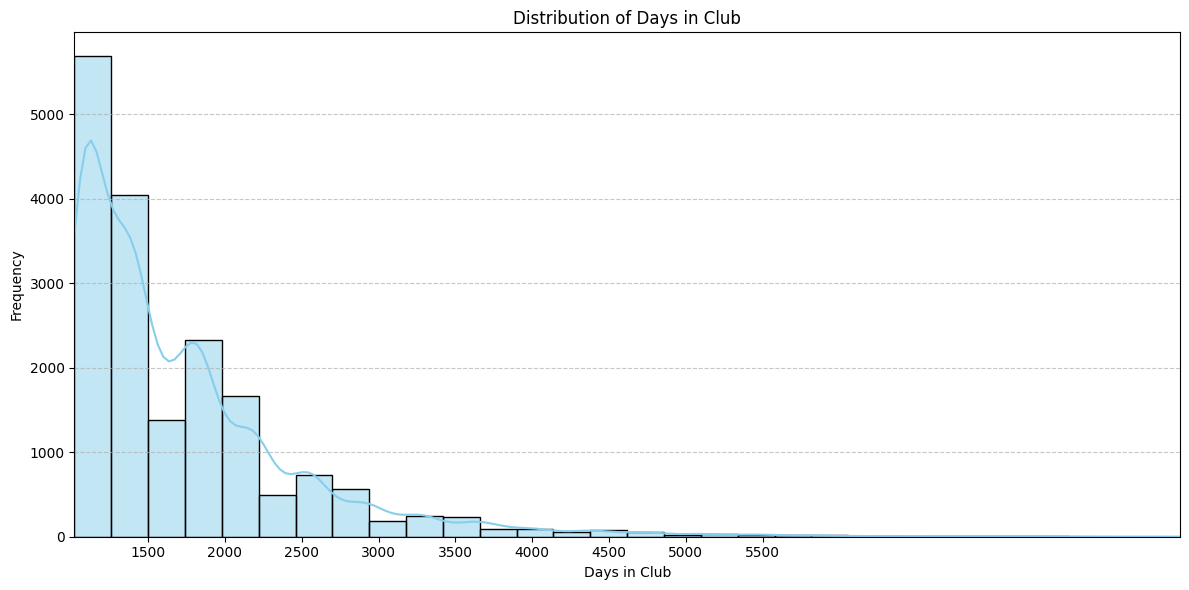

In [212]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(club["days_diff"], bins=30, kde=True, color='skyblue')
plt.xticks(range(0, 6000, 500))
plt.xlim(club["days_diff"].min(), club["days_diff"].max())
plt.xlabel('Days in Club')
plt.ylabel('Frequency')
plt.title('Distribution of Days in Club')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [213]:
club["league_name"].value_counts().sort_values(ascending = False)[0:15]


league_name
USA Major League Soccer          747
English League Championship      668
Argentina Primera División       652
English Premier League           632
Spain Primera Division           588
Japanese J. League Division 1    568
Spanish Segunda División         552
English League One               549
English League Two               544
French Ligue 1                   538
German 1. Bundesliga             524
German 3. Bundesliga             513
Turkish Süper Lig                498
French Ligue 2                   497
Polish T-Mobile Ekstraklasa      485
Name: count, dtype: int64

In [214]:
question4 = club.join(skills.set_index("sofifa_id"), how = "inner",  on='sofifa_id')[["days_diff", "overall", "league_name"]]


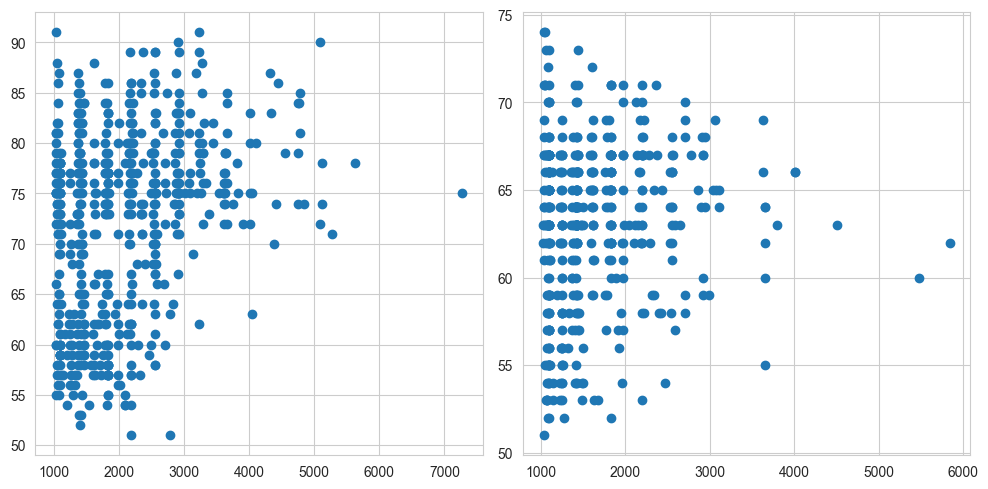

In [238]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

premier_league = question4[question4["league_name"] == "English Premier League"]
Ekstraklasa = question4[question4["league_name"] == "Polish T-Mobile Ekstraklasa"]

axes[0].scatter(premier_league["days_diff"], premier_league["overall"])
axes[1].scatter(Ekstraklasa["days_diff"], Ekstraklasa["overall"])

plt.tight_layout()
plt.show()

#### *Consclusion : premier league has more young players with fresh contracts and high overall scores, ekstraklasa has lot more long term players*

### in table format describe top 5 and bottom 5 clubs from premier league in terms of work_rate and compare their finances


In [216]:
question5 = skills.join(club.set_index("sofifa_id"), how = "inner", on = "sofifa_id")
question5 = question5.join(player_finance.set_index("sofifa_id"), how="inner", on="sofifa_id")
question5 = question5[question5["league_name"].isin(["English Premier League"])]
question5["work_rate"] = question5["work_rate"].str.split("/", expand = True)[0]
mapping = {"High" : 3, "Medium" : 2, "Low" : 1}
question5["work_rate"] = question5["work_rate"].map(mapping)
cols = list(question5.columns[question5.columns.str.contains("eur")]) + ["work_rate", "club_name"]
question5 = question5[cols]
question5_grouped = question5.groupby("club_name").agg({
    'wage_k_eur': 'mean',
    'release_clause_mln_eur': 'mean',
    'value_mln_eur': 'sum',
    'work_rate': 'mean'
}).reset_index().sort_values("work_rate", ascending = False)
pd.concat([question5_grouped.head(5), question5_grouped.tail(5)])

,club_name,wage_k_eur,release_clause_mln_eur,value_mln_eur,work_rate
11,Manchester City,112.825000,78.485375,1299.510,2.531250
8,Leeds United,37.529032,17.977419,274.950,2.516129
12,Manchester United,103.242424,58.713576,1008.730,2.484848
14,Norwich City,18.100000,9.058767,124.640,2.433333
16,Tottenham Hotspur,63.935484,41.306452,653.100,2.419355
17,Watford,29.740741,9.241926,122.225,2.222222
19,Wolverhampton Wanderers,41.290323,19.142194,297.080,2.161290
5,Chelsea,90.937500,53.985219,894.650,2.093750
4,Burnley,22.454545,10.967758,184.850,2.090909
13,Newcastle United,25.812500,11.623281,187.475,2.062500


### Is there a correlation between work rate and club worth?


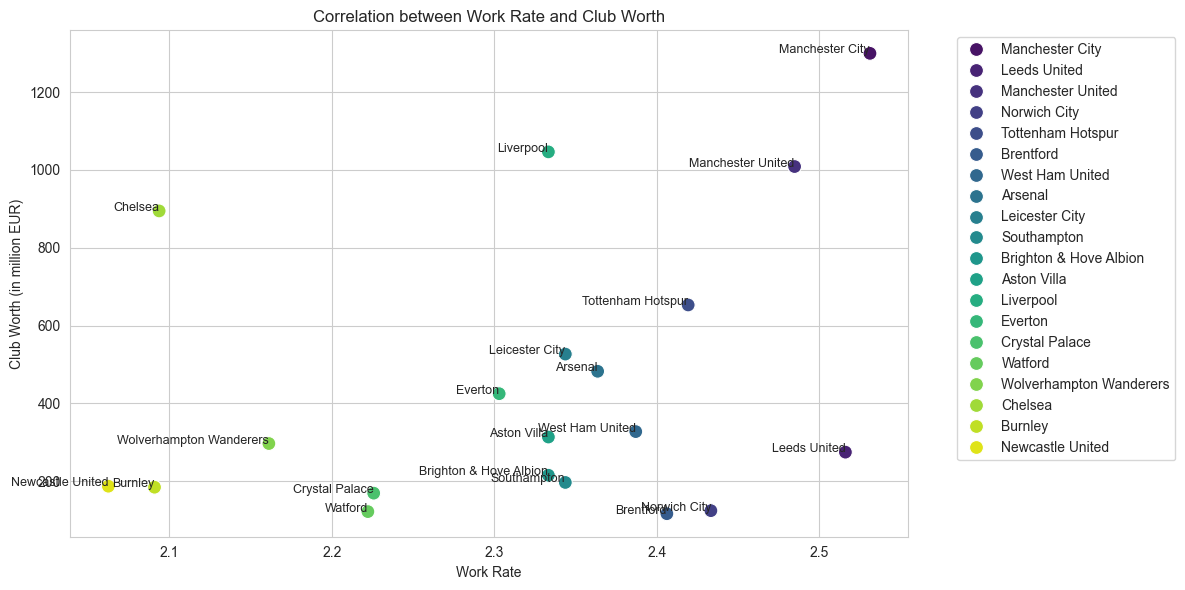

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=question5_grouped, x='work_rate', y='value_mln_eur', hue='club_name', palette='viridis', s=100)

# Annotate each point with the club name
for i in range(question5_grouped.shape[0]):
    plt.text(x=question5_grouped['work_rate'].iloc[i], 
             y=question5_grouped['value_mln_eur'].iloc[i], 
             s=question5_grouped['club_name'].iloc[i], 
             fontsize=9, 
             ha='right')

plt.title('Correlation between Work Rate and Club Worth')
plt.xlabel('Work Rate')
plt.ylabel('Club Worth (in million EUR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Manchester City has biggest work rate along with biggest wage and value. Chelsea, despite being one of the best teams, have an inappropriately low work rate, unlike Leeds United*

### which nationality contains most players who plays with each other in the same club?


In [222]:
question7 = player_international.join(club.set_index("sofifa_id"), how = "inner", on= "sofifa_id")[["nationality_name", "club_name"]]
question7_grouped = question7.groupby(["club_name", "nationality_name"]).agg({
    'nationality_name': 'count'
}).rename(columns={'nationality_name': 'count_max'}).reset_index()
question7_grouped = question7_grouped.loc[question7_grouped.groupby("club_name")['count_max'].idxmax()]
club_counts = question7["club_name"].value_counts().reset_index()
club_counts.columns = ['club_name', 'count']
question7 = question7_grouped.join(club_counts.set_index("club_name"), how = "inner", on = "club_name")
question7["percentage"] =  100 * (question7["count_max"] / question7["count"] )
question7 = question7.sort_values("percentage", ascending = False)
pd.concat([question7.head(5), question7.tail(5)])

,club_name,nationality_name,count_max,count,percentage
251,Academia Puerto Cabello,Venezuela,27,27,100.000000
4587,São Paulo,Brazil,20,20,100.000000
4417,Sport Club Corinthians Paulista,Brazil,20,20,100.000000
950,Ceará Sporting Club,Brazil,20,20,100.000000
1151,Club Deportivo Guadalajara,Mexico,30,30,100.000000
2842,Lazio,Italy,7,32,21.875000
3446,PAOK,Greece,6,28,21.428571
1883,FC Red Bull Salzburg,Austria,6,28,21.428571
2820,LOSC Lille,France,6,29,20.689655
4774,Udinese Calcio,Brazil,3,22,13.636364


#### *Conclusion : Brazilians clubs lead in most homogeneous nationalities, lowest percentages approximetly 20 %*

### which leagues gather most market value in players

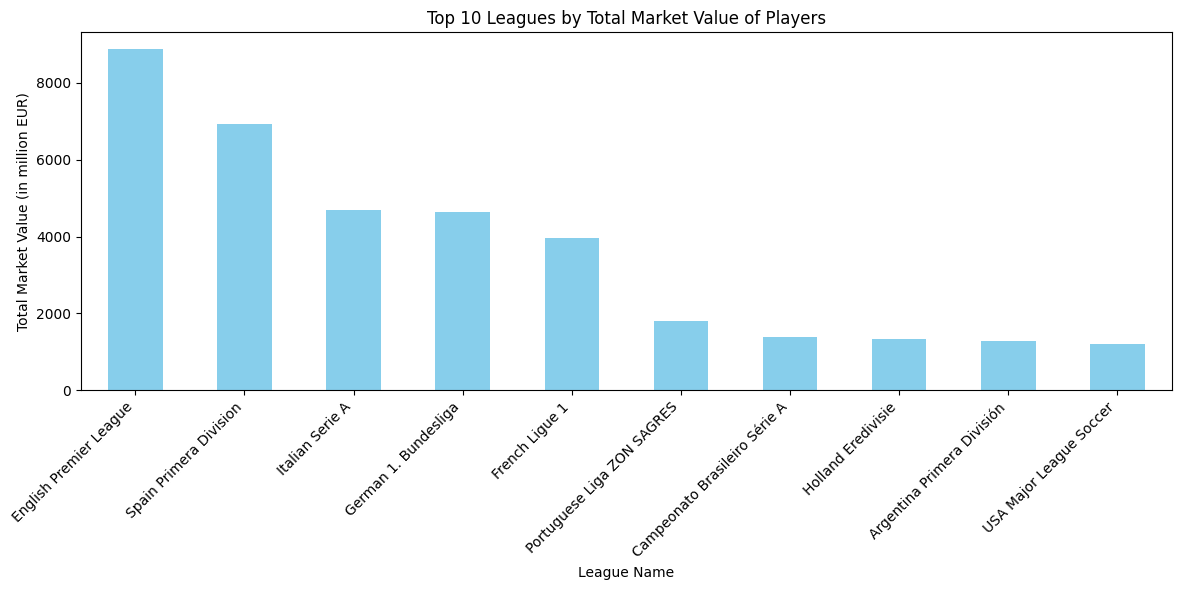

In [223]:
import matplotlib.pyplot as plt

league_market_value = club.join(player_finance.set_index("sofifa_id"), on="sofifa_id")
league_market_value = league_market_value.groupby("league_name")["value_mln_eur"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
league_market_value.plot(kind='bar', color='skyblue')
plt.xlabel('League Name')
plt.ylabel('Total Market Value (in million EUR)')
plt.title('Top 10 Leagues by Total Market Value of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

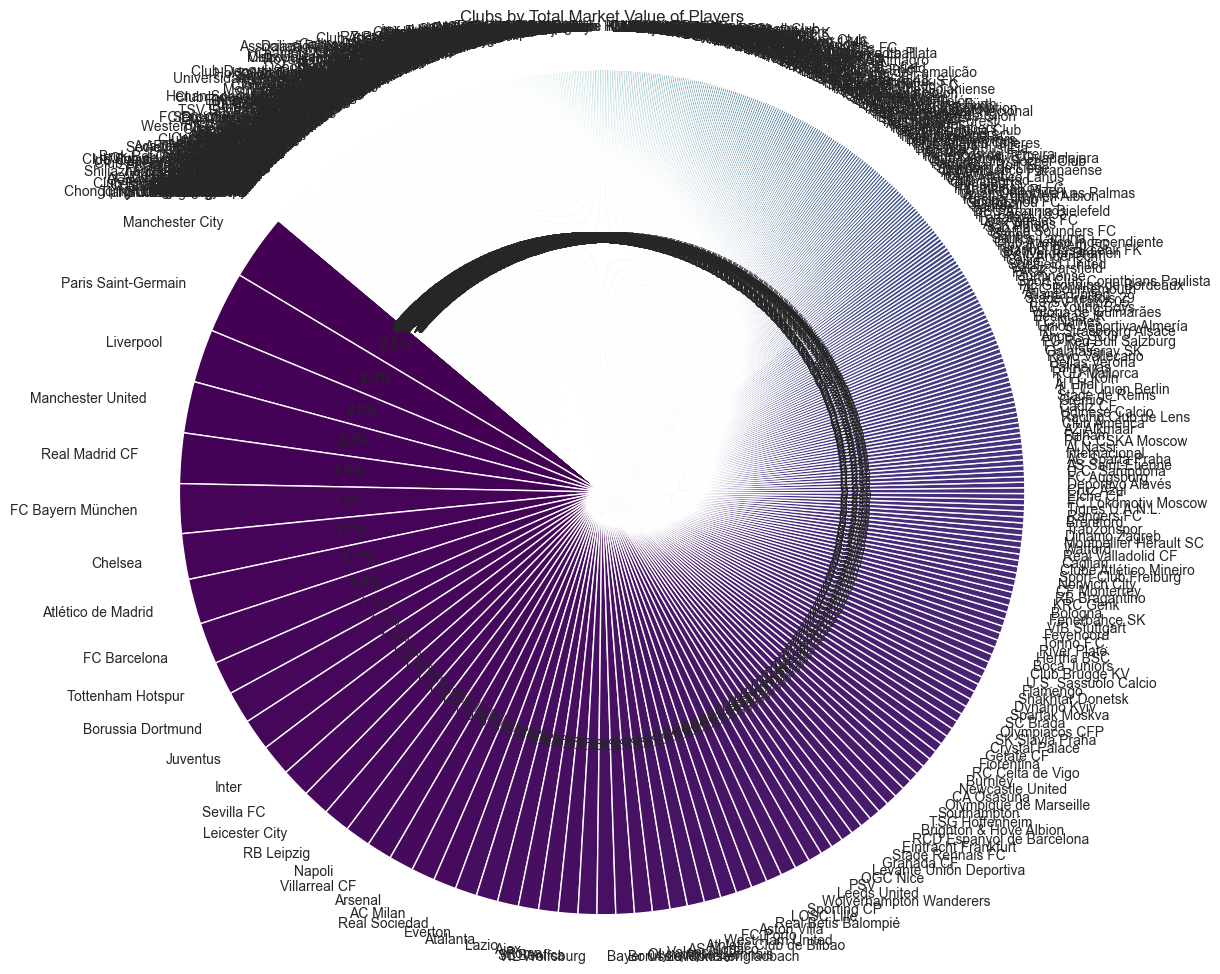

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

club_market_value = club.join(player_finance.set_index("sofifa_id"), on="sofifa_id")
club_market_value = club_market_value.groupby("club_name")["value_mln_eur"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 12))
plt.pie(club_market_value.values, labels=club_market_value.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(club_market_value)))
plt.title('Clubs by Total Market Value of Players')
plt.axis('equal')
plt.show()


*Isn't this pie chart cool? 😂*

C:\Users\samir\AppData\Local\Temp\ipykernel_26480\243161635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


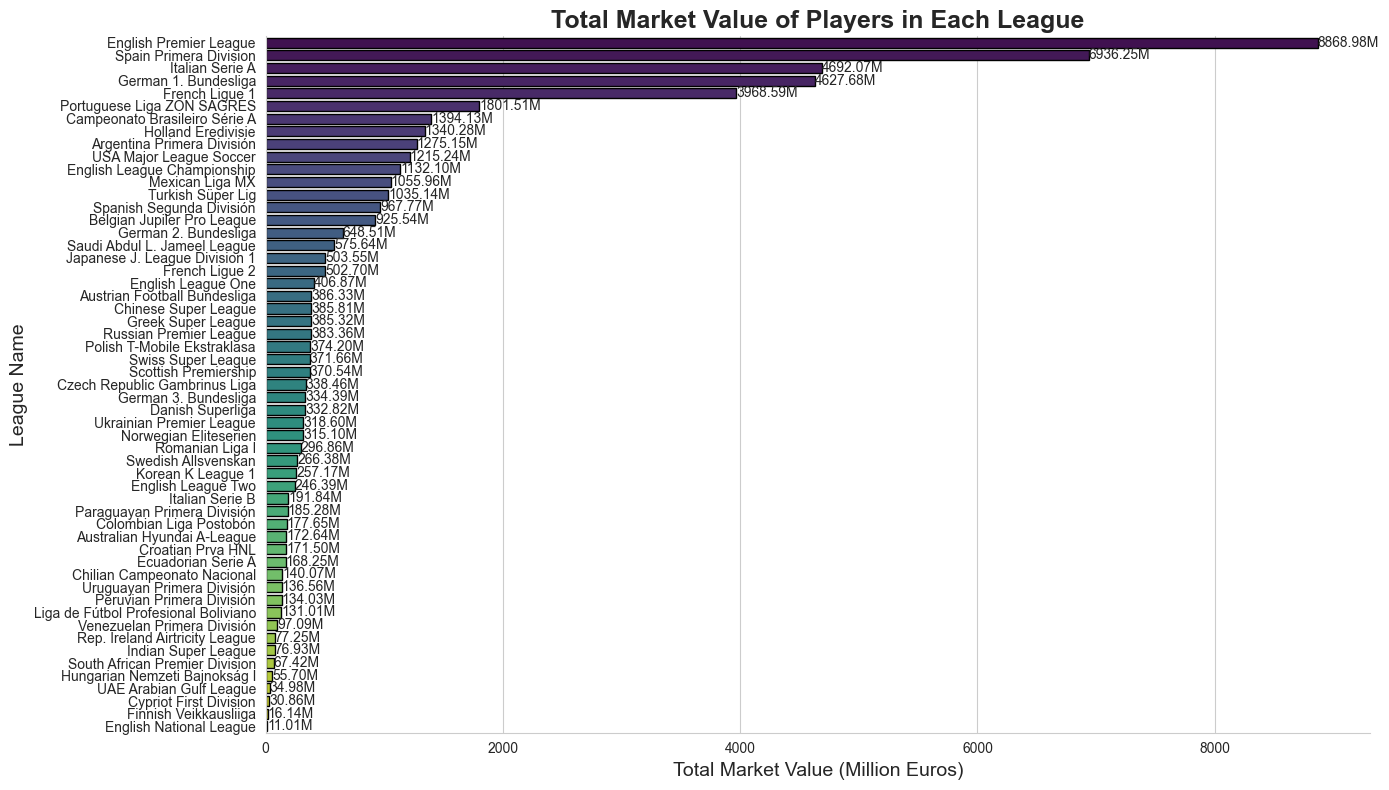

<Figure size 640x480 with 0 Axes>

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

league_market_value = club.join(player_finance.set_index("sofifa_id"), on="sofifa_id")
league_market_value = league_market_value.groupby("league_name")["value_mln_eur"].sum().sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(
    x=league_market_value.values, 
    y=league_market_value.index, 
    palette="viridis", 
    edgecolor="black"
)

for index, value in enumerate(league_market_value.values):
    bar_plot.text(value, index, f'{value:.2f}M', va='center')

plt.title('Total Market Value of Players in Each League', fontsize=18, fontweight='bold')
plt.xlabel('Total Market Value (Million Euros)', fontsize=14)
plt.ylabel('League Name', fontsize=14)

sns.despine()

plt.tight_layout()
plt.show()


*Yes ! This looks cool 😂😁 that's it for today !!!!!!!!!* <br>
### Conclusion: Big part of market vvalue belongs to 4 main leagues: Premier league, premier division, seria A, and Bundelsliga